In [ ]:
!pip install pyreadr

     |████████████████████████████████| 361 kB 5.3 MB/s 
     |████████████████████████████████| 11.3 MB 51.5 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.5 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pyreadr
import pandas as pd

result = pyreadr.read_r('/content/drive/MyDrive/Colab Notebooks/dataset/acc_walking_IU.rda')
# done! let's see what we got
print(result.keys()) # let's check what objects we got
acc_walking_IU = result["acc_walking_IU"]
acc_walking_IU 

odict_keys(['acc_walking_IU'])


,subj_id,loc_id,time_s,x,y,z
0,id86237981,left_wrist,0.00,-0.270,-0.773,-0.160
1,id86237981,left_wrist,0.01,-0.266,-0.738,-0.172
2,id86237981,left_wrist,0.02,-0.277,-0.707,-0.168
3,id86237981,left_wrist,0.03,-0.277,-0.680,-0.160
4,id86237981,left_wrist,0.04,-0.289,-0.656,-0.160
...,...,...,...,...,...,...
2590443,idff99de96,right_ankle,206.71,0.098,1.059,0.090
2590444,idff99de96,right_ankle,206.72,0.105,1.070,0.074
2590445,idff99de96,right_ankle,206.73,0.125,1.094,0.090
2590446,idff99de96,right_ankle,206.74,0.141,1.129,0.090


In [ ]:
# result = pyreadr.read_r('stride_template.rda')
# print(result.keys())
# stride_template = result

In [ ]:
acc_walking_IU

,subj_id,loc_id,time_s,x,y,z
0,id86237981,left_wrist,0.00,-0.270,-0.773,-0.160
1,id86237981,left_wrist,0.01,-0.266,-0.738,-0.172
2,id86237981,left_wrist,0.02,-0.277,-0.707,-0.168
3,id86237981,left_wrist,0.03,-0.277,-0.680,-0.160
4,id86237981,left_wrist,0.04,-0.289,-0.656,-0.160
...,...,...,...,...,...,...
2590443,idff99de96,right_ankle,206.71,0.098,1.059,0.090
2590444,idff99de96,right_ankle,206.72,0.105,1.070,0.074
2590445,idff99de96,right_ankle,206.73,0.125,1.094,0.090
2590446,idff99de96,right_ankle,206.74,0.141,1.129,0.090


In [ ]:
acc_walking_IU['loc_id'].unique()

array(['left_wrist', 'left_hip', 'left_ankle', 'right_ankle'],
      dtype=object)

In [ ]:
left_ankle_data = acc_walking_IU[acc_walking_IU.loc_id == "left_ankle"]
left_ankle_data

,subj_id,loc_id,time_s,x,y,z
41306,id86237981,left_ankle,0.00,-0.582,0.852,0.938
41307,id86237981,left_ankle,0.01,-0.398,0.598,0.895
41308,id86237981,left_ankle,0.02,0.480,0.664,0.484
41309,id86237981,left_ankle,0.03,0.977,0.426,0.094
41310,id86237981,left_ankle,0.04,1.066,0.094,-0.039
...,...,...,...,...,...,...
2569767,idff99de96,left_ankle,206.71,-0.031,-1.113,0.258
2569768,idff99de96,left_ankle,206.72,-0.102,-1.141,0.285
2569769,idff99de96,left_ankle,206.73,-0.027,-1.215,0.305
2569770,idff99de96,left_ankle,206.74,-0.047,-1.285,0.230


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.signal import find_peaks
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
left_ankle_data['magnitude'] = np.sqrt(left_ankle_data['x']**2+left_ankle_data['y']**2+left_ankle_data['z']**2)
left_ankle_data

,subj_id,loc_id,time_s,x,y,z,magnitude
41306,id86237981,left_ankle,0.00,-0.582,0.852,0.938,1.394443
41307,id86237981,left_ankle,0.01,-0.398,0.598,0.895,1.147621
41308,id86237981,left_ankle,0.02,0.480,0.664,0.484,0.951605
41309,id86237981,left_ankle,0.03,0.977,0.426,0.094,1.069972
41310,id86237981,left_ankle,0.04,1.066,0.094,-0.039,1.070847
...,...,...,...,...,...,...,...
2569767,idff99de96,left_ankle,206.71,-0.031,-1.113,0.258,1.142932
2569768,idff99de96,left_ankle,206.72,-0.102,-1.141,0.285,1.180470
2569769,idff99de96,left_ankle,206.73,-0.027,-1.215,0.305,1.252988
2569770,idff99de96,left_ankle,206.74,-0.047,-1.285,0.230,1.306267


In [ ]:
left_ankle_data = left_ankle_data.dropna()
left_ankle_data.shape

(647612, 7)

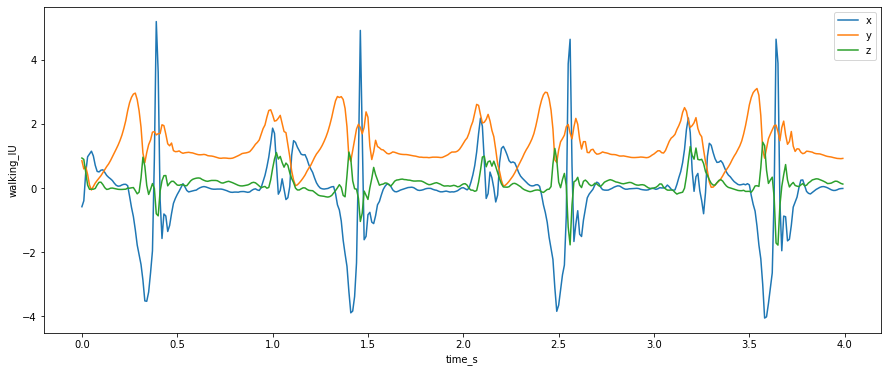

In [ ]:
plt.figure(figsize = (15, 6))
data_36 = left_ankle_data[(left_ankle_data['subj_id'] == 'id86237981') ][:400]
sns.lineplot(y = 'x', x = 'time_s', data = data_36)
sns.lineplot(y = 'y', x = 'time_s', data = data_36)
sns.lineplot(y = 'z', x = 'time_s', data = data_36)
plt.legend(['x', 'y', 'z'])
plt.ylabel('walking_IU')
# plt.title(i, fontsize = 15)
plt.show()

In [ ]:
data_36

,subj_id,loc_id,time_s,x,y,z,magnitude
42306,id86237981,left_ankle,10.00,-1.426,1.227,0.227,1.894870
42307,id86237981,left_ankle,10.01,-1.125,1.656,0.270,2.020114
42308,id86237981,left_ankle,10.02,-0.727,1.453,0.234,1.641491
42309,id86237981,left_ankle,10.03,-0.398,1.168,0.180,1.247008
42310,id86237981,left_ankle,10.04,-0.301,1.164,0.148,1.211363
...,...,...,...,...,...,...,...
43301,id86237981,left_ankle,19.95,0.957,2.129,-0.102,2.336428
43302,id86237981,left_ankle,19.96,1.270,2.195,0.055,2.536523
43303,id86237981,left_ankle,19.97,1.703,2.180,0.359,2.789532
43304,id86237981,left_ankle,19.98,2.055,2.121,0.801,3.059946


In [ ]:
len(data_36)

1000

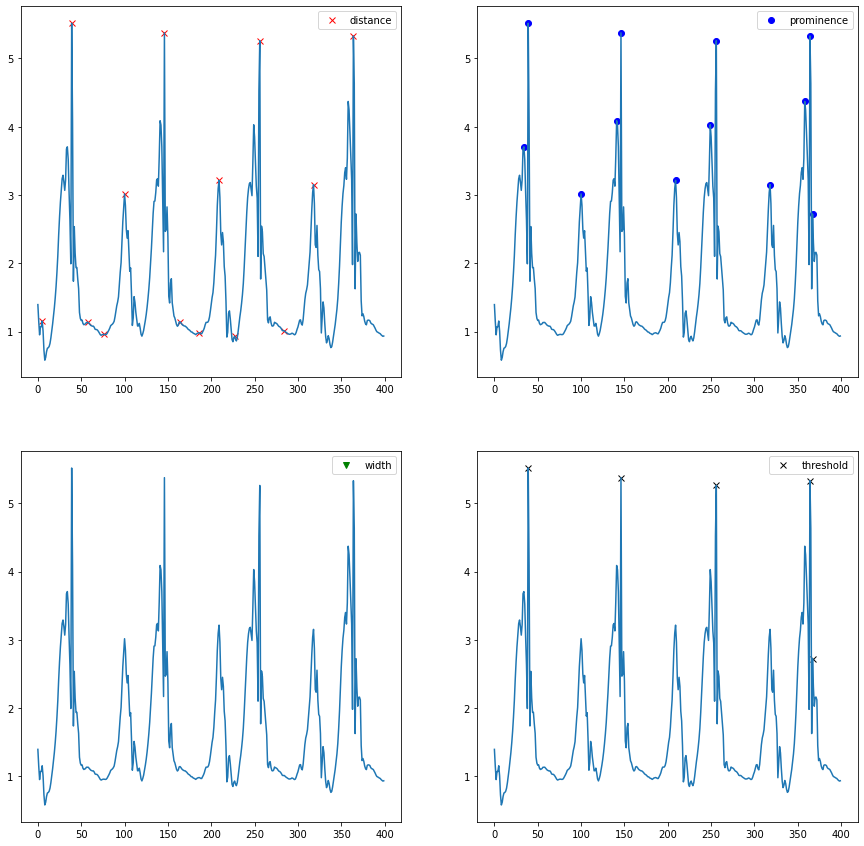

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import find_peaks

f, axs = plt.subplots(2,2,figsize=(15,15))

x = data_36['magnitude'].values
peaks, _ = find_peaks(x, distance=18)
peaks2, _ = find_peaks(x, prominence=1)      # BEST!
peaks3, _ = find_peaks(x, width=18)
peaks4, _ = find_peaks(x, threshold=0.4)     # Required vertical distance to its direct neighbouring samples, pretty useless

plt.subplot(2, 2, 1)
plt.plot(peaks, x[peaks], "xr"); plt.plot(x); plt.legend(['distance'])

plt.subplot(2, 2, 2)
plt.plot(peaks2, x[peaks2], "ob"); plt.plot(x); plt.legend(['prominence'])

plt.subplot(2, 2, 3)
plt.plot(peaks3, x[peaks3], "vg"); plt.plot(x); plt.legend(['width'])

plt.subplot(2, 2, 4)
plt.plot(peaks4, x[peaks4], "xk"); plt.plot(x); plt.legend(['threshold'])

plt.show()

In [ ]:
appended_data = []
df = []

for k in left_ankle_data.subj_id.unique():
    data_1 = left_ankle_data[(left_ankle_data['subj_id'] == k) ]

    x = data_1['magnitude'].values

    peaks2, _ = find_peaks(x, prominence=0.5) 
    initial = np.zeros(shape = len(x))

    start = peaks2[0]

    for index,each in enumerate(peaks2):
      
      if(index %2 != 0):
        initial[start:each] = 1
      start = each

    data_1["label"] = initial
    df.append(data_1)

appended_data = pd.concat(df)

appended_data

,subj_id,loc_id,time_s,x,y,z,magnitude,label
41306,id86237981,left_ankle,0.00,-0.582,0.852,0.938,1.394443,0.0
41307,id86237981,left_ankle,0.01,-0.398,0.598,0.895,1.147621,0.0
41308,id86237981,left_ankle,0.02,0.480,0.664,0.484,0.951605,0.0
41309,id86237981,left_ankle,0.03,0.977,0.426,0.094,1.069972,0.0
41310,id86237981,left_ankle,0.04,1.066,0.094,-0.039,1.070847,0.0
...,...,...,...,...,...,...,...,...
2569767,idff99de96,left_ankle,206.71,-0.031,-1.113,0.258,1.142932,0.0
2569768,idff99de96,left_ankle,206.72,-0.102,-1.141,0.285,1.180470,0.0
2569769,idff99de96,left_ankle,206.73,-0.027,-1.215,0.305,1.252988,0.0
2569770,idff99de96,left_ankle,206.74,-0.047,-1.285,0.230,1.306267,0.0


In [ ]:
appended_data[28:50]

,subj_id,loc_id,time_s,x,y,z,magnitude,label
41334,id86237981,left_ankle,0.28,-1.301,2.965,-0.078,3.238813,0.0
41335,id86237981,left_ankle,0.29,-1.777,2.762,-0.180,3.289190,0.0
41336,id86237981,left_ankle,0.30,-2.090,2.410,-0.125,3.192464,0.0
41337,id86237981,left_ankle,0.31,-2.387,1.902,0.313,3.068117,0.0
41338,id86237981,left_ankle,0.32,-2.875,1.094,0.965,3.223924,0.0
41339,id86237981,left_ankle,0.33,-3.523,0.793,0.680,3.674613,0.0
41340,id86237981,left_ankle,0.34,-3.535,1.109,0.086,3.705874,1.0
41341,id86237981,left_ankle,0.35,-3.246,1.355,-0.199,3.523087,1.0
41342,id86237981,left_ankle,0.36,-2.645,1.500,-0.043,3.041032,1.0
41343,id86237981,left_ankle,0.37,-1.961,1.746,0.141,2.629433,1.0


In [ ]:
appended_data.to_csv("left_ankle_dataWithlabels.csv")

In [ ]:
x = data_36['magnitude'].values
peaks2, _ = find_peaks(x, prominence=0.5)
peaks2

array([   31,    93,   138,   204,   248,   315,   356,   422,   459,
         562,   630,   668,   734,   774,   841,   880,   946,   988,
        1051,  1091,  1156,  1196,  1263,  1304,  1367,  1408,  1459,
        1511,  1562,  1617,  1681,  1721,  1787,  1827,  1877,  1932,
        1984,  2038,  2088,  2142,  2204,  2244,  2294,  2351,  2399,
        2455,  2502,  2557,  2606,  2660,  2723,  2762,  2816,  2868,
        2918,  2974,  3023,  3078,  3125,  3178,  3227,  3281,  3331,
        3387,  3435,  3490,  3539,  3595,  3646,  3698,  3752,  3802,
        3870,  3908,  3961,  4012,  4061,  4117,  4180,  4222,  4270,
        4327,  4389,  4430,  4480,  4537,  4586,  4642,  4706,  4746,
        4795,  4852,  4900,  4956,  5006,  5058,  5109,  5164,  5212,
        5270,  5332,  5372,  5438,  5478,  5540,  5580,  5629,  5685,
        5735,  5791,  5837,  5894,  5942,  5999,  6047,  6101,  6150,
        6204,  6268,  6309,  6373,  6414,  6521,  6568,  6625,  6732,
        6782,  6834,

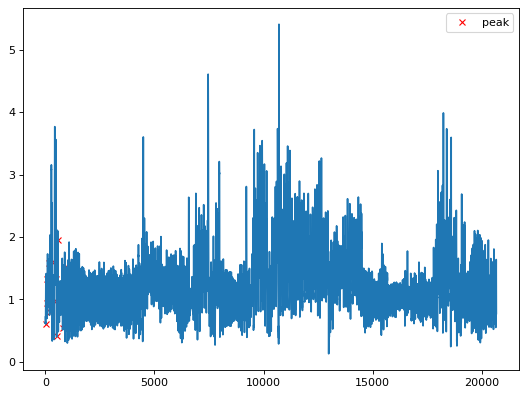

In [ ]:
from scipy import signal
from matplotlib.pyplot import figure
xs = np.arange(0, np.pi, 0.05)
data = data_36['magnitude'].values
# peakind = signal.find_peaks_cwt(data, np.arange(1,10))
peakind = signal.find_peaks_cwt(data, widths = np.arange(1,30) )  
figure(figsize=(8, 6), dpi=80)
plt.plot(peakind, x[peakind], "xr"); plt.plot(x); plt.legend(['peak'])
plt.show()